# Computer Vision

## An overview of edge detection, corner detection, sinusoid Hough space and their Implementation

    *Name:* Byamugisha Africano
    *Registration No:* 2023/HD05/04595/U
    *Date:* February 27, 2024

## Objectives / Contents
1. Plotting the sinusoid waves in a Hough space
2. Convolution; Writing a function that convolves an image with a given convolution filter
3. Edge detection; Writing a function that finds edge intensity and orientation in an image
4. The Hough transform; Writing a function that applies the Hough Transform to an edge magnitude image

## Plotting the sinusoid waves in a Hough space
Plotting point (10, 10) and points (20, 20) and (30, 30) in the image, plot the corresponding sinusoid waves in Hough space, and visualize how their intersection point defines the line. What is (m, c) for this line? (Using Python to plot the curves)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

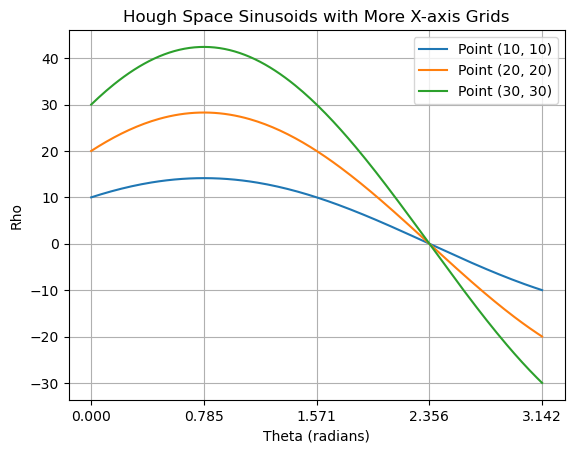

In [5]:
# Parameters - Assuming a square image with dimensions
W = 50
H = 50

# Image points to consider
points = [(10, 10), (20, 20), (30, 30)]

# Hough space discretization
theta_range = np.linspace(0, np.pi, 180)
rho_max = np.sqrt(W**2 + H**2)
rho_range = np.linspace(-rho_max, rho_max, 400)

# Plot sinusoids for each point
for (x, y) in points:
    rho = x * np.cos(theta_range) + y * np.sin(theta_range)
    plt.plot(theta_range, rho, label=f'Point ({x}, {y})')
plt.xlabel('Theta (radians)')
plt.ylabel('Rho')
plt.legend()
plt.grid(True)
num_xticks = 5
xticks = np.linspace(0, np.pi, num_xticks)
plt.xticks(xticks)
plt.title('Hough Space Sinusoids with More X-axis Grids')
plt.show()

In [8]:
# # (Approximate) Intersection from the plot
theta = 2.356  # Estimation of the intersection point's theta from  the plot
rho = 0   # Estimation of the intersection point's rho value

# Calculating (m, c) 
m = -np.cos(theta) / np.sin(theta)
c = rho / np.sin(theta)

print(f"The (slope (m), and intercept (c)) for the line are ({round(m, 3)}, {round(c, 3)})")

The (slope (m), and intercept (c)) for the line are (1.0, 0.0)


In [ ]:
# !pip install opencv-python

## Convolution
*Writing a function that convolves an image with a given convolution filter*
`img1 = myImageFilter(img0, h)` 
As input, the function takes a grayscale image (img0) and a convolution filter stored in matrix h. The output of the function should be an image img1 of the same size as img0 which results from convolving img0 with h.

In [75]:
def myImageFilter(img_path, h):

    import numpy as np
    import cv2
    import matplotlib.pyplot as plt
    
    # Loading image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Ensuring odd-sized kernel matrix for symmetric padding
    if h.shape[0] % 2 == 0 or h.shape[1] % 2 == 0:
        raise ValueError("convolution filter matrix must be odd for symmetric padding.")

    # Calculating padding and apply it
    padding = h.shape[0] // 2  # Assumes square filter
    img_padded = np.pad(img, padding, mode='constant')

    # Performing convolution efficiently using SciPy
    from scipy.signal import convolve2d
    filtered_img = convolve2d(img_padded, h, mode='same', boundary='fill')

    # Cliping values outside of [0, 255] range (optional)
    filtered_img = np.clip(filtered_img, 0, 255).astype(np.uint8)

    return filtered_img

def display_results(original_img, filtered_img, title):
    """Displaying original and filtered images side by side."""
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img, cmap='gray')
    plt.title(f"{title}")

    plt.show()

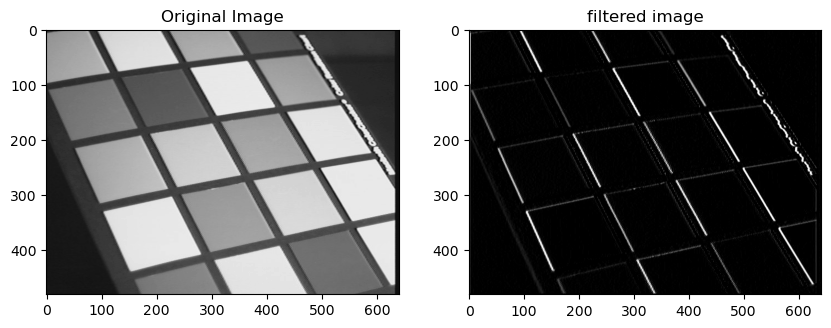

In [76]:
# Function call one ------
# defining convolution filter matrix 
image_path = "data/img01.jpg"
h = np.array([[1, 0, -1],
              [2, 0, -2],
              [1, 0, -1]])

if __name__ == "__main__":
    display_results(
        cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), # getting teh original image
        myImageFilter(image_path, h), # outputing the filtered image
        "Filtered image"
    )

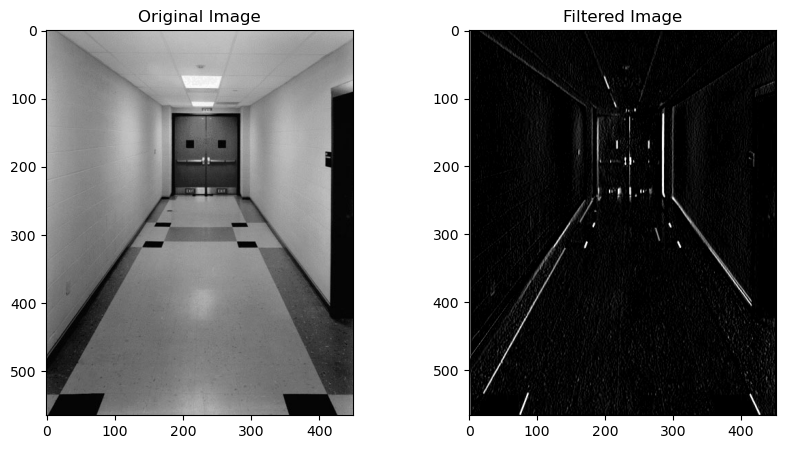

In [77]:
# Function call two ------
# defining convolution filter matrix 
image_path = "data/img03.jpg"
h = np.array([[1, 0, -1],
              [1, 0, -1],
              [2, 0, -2]])

if __name__ == "__main__":
    display_results(
        cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), # getting teh original image
        myImageFilter(image_path, h), # outputing the filtered image
        "Filtered Image"
    )

## Edge detection
*Writing a function that finds edge intensity and orientation in an image*
Display the output of your function for one of the given images
`img1 = myEdgeFilter(img0, sigma)`
The function will input a grayscale image (img0) and scalar (sigma). sigma is the standard deviation of the Gaussian smoothing kernel to be used before edge detection. The function will output img1, the edge magnitude image. 

In [70]:
def myEdgeFilter(img_path, sigma):
    import cv2
    import numpy as np
    from matplotlib import pyplot as plt

    img0 = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
    img_smoothed = cv2.GaussianBlur(img0, (0, 0), sigma)  # Apply smoothing

    # Calculating gradients using Sobel edge operator
    sobelx = cv2.Sobel(img_smoothed, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img_smoothed, cv2.CV_64F, 0, 1, ksize=5)

    # Calculating magnitude and orientation
    img1, orientation = cv2.cartToPolar(sobelx, sobely)
    return img1 

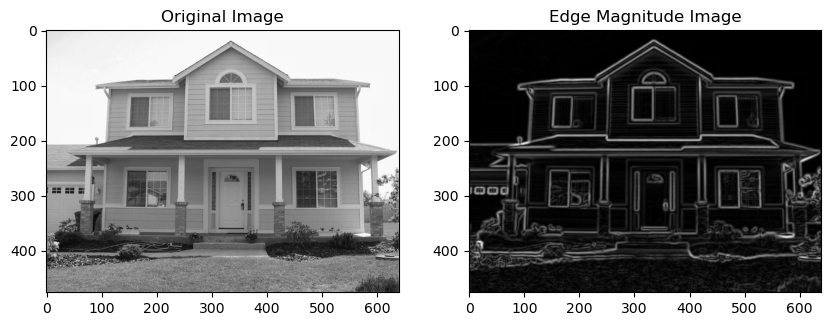

In [78]:
#Function Call one ---------------------- #
image_path = 'data/img07.jpg'
sigma = 1.5 
edge_magnitude = myEdgeFilter(image_path, sigma)

display_results(
    cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), # getting teh original image
    edge_magnitude, # outputing the filtered image
    "Edge Magnitude Image"
)

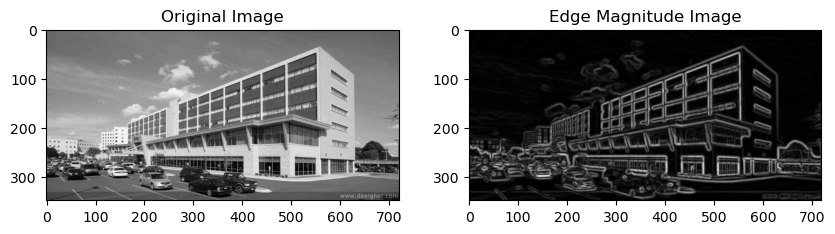

In [80]:
#Function Call two ---------------------- #
image_path = 'data/img09.jpg'
sigma = 1.5
edge_magnitude = myEdgeFilter(image_path, sigma)

display_results(
    cv2.imread(image_path, cv2.IMREAD_GRAYSCALE), # getting teh original image
    edge_magnitude, # outputing the filtered image
    "Edge Magnitude Image"
)

## The Hough transform 
*Writing a function that applies the Hough Transform to an edge magnitude image*
Display the output for one of the images
`[img hough, rhoScale, thetaScale] = myHoughTransform(img threshold, rhoRes, thetaRes)`
img threshold is the edge magnitude image, thresholded to ignore pixels with a low edge filter response. rhoRes (scalar) is the distance resolution of the Hough transform accumulator in pixels, and thetaRes (scalar) is the angular resolution of the accumulator in radians. img hough is the Hough transform accumulator that contains the number of “votes' ' for all the possible lines passing through the image. rhoScale and thetaScale are the arrays of ρ and θ values over which myHoughTransform generates the Hough transform matrix img hough. For example, if rhoScale[i] = ρi and thetaScale[j] = θj, then img hough[i,j] contains the votes for ρ = ρi and θ = θj.

In [83]:
def myHoughTransform(img_path, rho_res, theta_res, canny_threshold1=50, canny_threshold2=150):
    import cv2
    import numpy as np
    
    img = cv2.imread(img_path, 0)  # Loading image as grayscale
    edges = cv2.Canny(img, canny_threshold1, canny_threshold2)  # Applying Canny edge detection

    rows, cols = edges.shape
    diag_len = int(np.ceil(np.sqrt(rows ** 2 + cols ** 2)))
    thetas = np.arange(0, np.pi, theta_res)
    rhos = np.arange(-diag_len, diag_len + 1, rho_res)

    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.uint64)
    y_idx, x_idx = np.nonzero(edges)

    for i in range(len(x_idx)):
        x = x_idx[i]
        y = y_idx[i]

        for j in range(len(thetas)):
            theta = thetas[j]
            rho = int(round(x * np.cos(theta) + y * np.sin(theta)))
            accumulator[np.where(rhos == rho)[0][0], j] += 1  # Corrected line

    return accumulator, rhos, thetas, edges


In [85]:
# Function Call
img_path = 'data/img07.jpg'
accumulator, rhos, thetas, edges = myHoughTransform(img_path, rho_res=1, theta_res=np.pi/180)

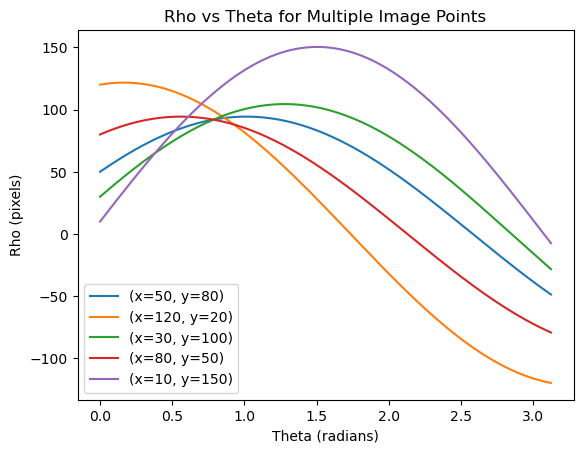

In [94]:
# Visualisation using teh values of rho and theta in a sinusoid form
# Using the Points below :
points = [(50, 80), (120, 20), (30, 100), (80, 50), (10, 150)]

for x, y in points:
    rhos_line = x * np.cos(thetas) + y * np.sin(thetas)
    rho_theta_pairs = sorted(zip(thetas, rhos_line))
    thetas_sorted, rhos_sorted = zip(*rho_theta_pairs)

    plt.plot(thetas_sorted, rhos_sorted, label='(x={}, y={})'.format(x, y))

plt.xlabel('Theta (radians)')
plt.ylabel('Rho (pixels)')
plt.title('Rho vs Theta for Multiple Image Points')
plt.legend()
plt.show()